In [1]:
from scipy import integrate
import math

In [4]:
#積分
def calcPi(x):
    return 4/(1+x**2)

In [5]:
# 計算結果と推定誤差
integrate.quad(calcPi, 0, 1)

(3.1415926535897936, 3.4878684980086326e-14)

In [7]:
# 無名関数
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

(3.1415926535897936, 3.4878684980086326e-14)

In [12]:
from numpy import sin
import numpy as np

In [13]:
integrate.quad(sin, 0, math.pi/1)

(2.0, 2.220446049250313e-14)

In [14]:
# 2重積分
def I(n):
    return integrate.dblquad(lambda t, x:np.exp(-x*t)/t**n, 0, np.inf, lambda x:1 , lambda x: np.inf)

In [17]:
print(I(1))
print(I(2))
print(I(3))
print(I(4))

(1.0000000000048965, 6.360750360104306e-08)
(0.4999999999985751, 1.3894083651858995e-08)
(0.33333333325010883, 1.3888461883425516e-08)
(0.2500000000043577, 1.2983033469368098e-08)


In [19]:
#ローレンツ方程式
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
def lorenz_func(v,t,p,r,b):
    return[-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

In [25]:
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

In [26]:
v = odeint(lorenz_func, v0, t, args=(p,r,b))

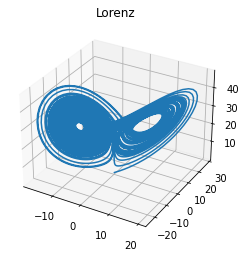

In [27]:
fig = plt.figure()
ax = fig.gca(projection= '3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])

plt.title('Lorenz')
plt.grid(True)

In [29]:
#積分
def calc_seki(x):
    return (x + 1)**2

In [30]:
integrate.quad(calc_seki, 0, 2)

(8.666666666666668, 9.621932880084691e-14)

In [33]:
integrate.quad(np.cos, 0, math.pi/1)

(4.402786869117102e-17, 2.2102239425853306e-14)

In [34]:
from scipy.optimize import fsolve

In [35]:
def f(x):
    y = 2 * x**2 + 2 *x -10
    return y

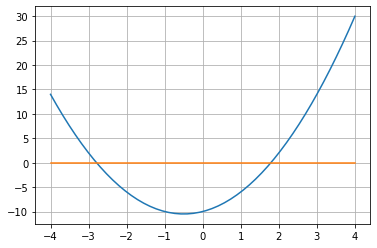

In [36]:
# グラフ化
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x, np.zeros(len(x)))
plt.grid(True)

In [38]:
x = fsolve(f, 2)
print(x)

[1.79128785]


In [39]:
x = fsolve(f, -3)
print(x)

[-2.79128785]


In [40]:
from scipy.optimize import minimize

In [42]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

In [43]:
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] -25.0

In [44]:
def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
        return sum_sq

In [46]:
x0 = [1,5,5,1]
print(objective(x0))

16


In [47]:
b = (1.0, 5.0)
bnds = (b,b,b,b)
con1 = {'type':'ineq', 'fun':constraint1}
con2 = {'type':'ineq', 'fun':constraint2}
cons = [con1, con2]

In [49]:
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(sol)

     fun: 16.0
     jac: array([12.,  1.,  2., 11.])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1., 5., 5., 1.])


In [51]:
def f1(x):
    y = 5*x -10
    return y

In [55]:
x = fsolve(f1, 2)
print(x)

[2.]


In [53]:
def f2(x):
    y = x**3 - 2*x**2 - 11*x + 12
    return y

In [56]:
print(fsolve(f2, -3))
print(fsolve(f2, 1))
print(fsolve(f2, 4))

[-3.]
[1.]
[4.]
